# EVN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [2]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

In [3]:
id_to_label[2]

'긍정'

In [4]:
sentences

['나는 오늘 기분이 좋아', '나는 오늘 우울해']

In [5]:
labels

[[1, 1, 1, 2], [1, 1, 0]]

## Vocabulary

In [6]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [7]:
dict.fromkeys(words)

{'기분이': None, '나는': None, '오늘': None, '우울해': None, '좋아': None}

In [8]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [9]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}  # PAD 길이를 조절할때, UNK vocab에 없는 단어
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [10]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [11]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [12]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [13]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [14]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [15]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [16]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

In [27]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)

    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

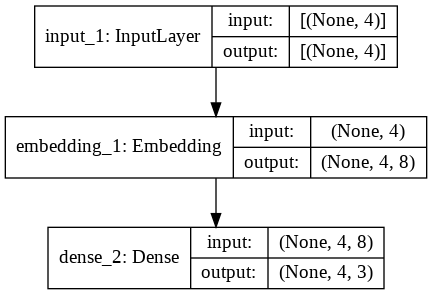

In [28]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 4, 8)              56        
_________________________________________________________________
dense_2 (Dense)              (None, 4, 3)              27        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


## 모델링

In [19]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)  # n_vocab, d_model
hidden = embedding(train_inputs)
train_inputs.shape, hidden

((2, 4), <tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
 array([[[ 0.01139537,  0.00350274, -0.03162926, -0.01978898,
          -0.03276332,  0.02574566,  0.03843603,  0.04484228],
         [-0.04359261, -0.00924345, -0.0222854 ,  0.01076062,
           0.0189711 , -0.01877885, -0.0257665 ,  0.01315149],
         [ 0.02522296, -0.02906858, -0.04839111, -0.00838534,
          -0.04028621,  0.00826145, -0.03987471,  0.0343661 ],
         [-0.00128454,  0.04066681,  0.0104967 ,  0.00678884,
          -0.01608454,  0.02808832, -0.00057469, -0.00614464]],
 
        [[ 0.01139537,  0.00350274, -0.03162926, -0.01978898,
          -0.03276332,  0.02574566,  0.03843603,  0.04484228],
         [-0.04359261, -0.00924345, -0.0222854 ,  0.01076062,
           0.0189711 , -0.01877885, -0.0257665 ,  0.01315149],
         [-0.01965604, -0.00870188,  0.03507925, -0.04035974,
           0.01381135, -0.01766319,  0.03041309, -0.02888119],
         [ 0.0105999 ,  0.01554432,  0.01441038, -0.00031284,


In [20]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.33474776, 0.31693995, 0.34831232],
        [0.34230772, 0.33016074, 0.3275315 ],
        [0.33721069, 0.3310148 , 0.3317745 ],
        [0.33075392, 0.3265105 , 0.34273556]],

       [[0.33474776, 0.31693995, 0.34831232],
        [0.34230772, 0.33016074, 0.3275315 ],
        [0.32221073, 0.3353701 , 0.3424192 ],
        [0.33549222, 0.3243895 , 0.34011832]]], dtype=float32)>

In [21]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear_2 = tf.keras.layers.Dense(3)
logits = linear_2(hidden)
logits

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[ 0.03292152,  0.01933433, -0.07195621],
        [ 0.0252342 , -0.03293323, -0.01727593],
        [ 0.0771613 , -0.02685185,  0.00725453],
        [-0.03772121,  0.04440168, -0.03308922]],

       [[ 0.03292152,  0.01933433, -0.07195621],
        [ 0.0252342 , -0.03293323, -0.01727593],
        [-0.00468666, -0.00222635,  0.03168632],
        [-0.01992963,  0.05470699, -0.04007783]]], dtype=float32)>

In [22]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[1.0334694 , 1.0195224 , 0.9305716 ],
         [1.0255553 , 0.9676032 , 0.9828725 ],
         [1.0802163 , 0.9735054 , 1.0072808 ],
         [0.9629814 , 1.0454022 , 0.9674522 ]],
 
        [[1.0334694 , 1.0195224 , 0.9305716 ],
         [1.0255553 , 0.9676032 , 0.9828725 ],
         [0.9953244 , 0.9977762 , 1.0321937 ],
         [0.98026764, 1.056231  , 0.96071464]]], dtype=float32),
 array([[[2.9835634],
         [2.9760308],
         [3.0610025],
         [2.9758358]],
 
        [[2.9835634],
         [2.9760308],
         [3.0252943],
         [2.9972131]]], dtype=float32))

In [23]:
# 결과값 비교
probs = numerator / denominator
probs

array([[[0.34638762, 0.341713  , 0.3118994 ],
        [0.34460506, 0.32513213, 0.33026287],
        [0.35289624, 0.31803483, 0.32906893],
        [0.32360032, 0.351297  , 0.3251027 ]],

       [[0.34638762, 0.341713  , 0.3118994 ],
        [0.34460506, 0.32513213, 0.33026287],
        [0.32900083, 0.32981128, 0.34118786],
        [0.32705972, 0.3524044 , 0.320536  ]]], dtype=float32)

In [24]:
# dense의 wieght, bias
weight, bias = linear_2.get_weights()
weight, bias

(array([[-0.00385392,  0.1205008 ,  0.62637526],
        [-0.40038916,  0.6252455 , -0.7188904 ],
        [-0.34227642,  0.62448627,  0.5148366 ],
        [-0.6675102 , -0.0732336 , -0.39276668],
        [-0.3247427 , -0.0682689 ,  0.32933885],
        [-0.53543824,  0.50939244, -0.16209549],
        [-0.35295537,  0.04929835, -0.6848393 ],
        [ 0.6030995 ,  0.37526518, -0.59717   ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [25]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[ 0.03292152,  0.01933433, -0.07195621],
        [ 0.0252342 , -0.03293322, -0.01727593],
        [ 0.0771613 , -0.02685185,  0.00725453],
        [-0.0377212 ,  0.04440168, -0.03308922]],

       [[ 0.03292152,  0.01933433, -0.07195621],
        [ 0.0252342 , -0.03293322, -0.01727593],
        [-0.00468666, -0.00222636,  0.03168632],
        [-0.01992964,  0.05470699, -0.04007783]]], dtype=float32)

## 학습

In [30]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 574ms/step - loss: 1.0855 - accuracy: 0.6250
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0818 - accuracy: 0.6250
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0781 - accuracy: 0.6250
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0744 - accuracy: 0.8750
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0707 - accuracy: 0.8750
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0670 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0633 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0596 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0560 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0523 - accuracy: 1.0000
Epoch 11/100
1/1 [=========

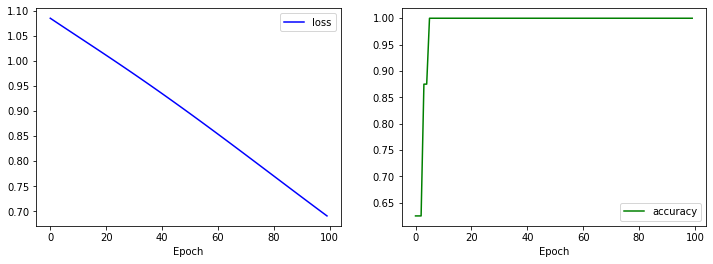

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [33]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 127ms/step - loss: 0.6868 - accuracy: 1.0000


[0.6868382692337036, 1.0]

## 예측

In [34]:
# 추론한 입력
string = '나는 기분이 우울해'

In [35]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [36]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [37]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [38]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.23791151, 0.5456025 , 0.21648598],
        [0.24041918, 0.5359798 , 0.22360103],
        [0.37647617, 0.27257186, 0.35095197],
        [0.24017422, 0.5306908 , 0.22913505]]], dtype=float32)

In [39]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])